# Bryce Hill | ECEN 4562

## Lab 05 - Power Spectral Density, Noise, and Symbol Timing Information



### 3/07/17

** <span style="color:red"> NOTE: must run *install_bryce_lib.sh* file to install libraries onto your computer. When done simply run the *uninstall_bryce_lib.sh* script </span>. **

In [1]:
# Import libraries
from pylab import *
import scipy.integrate as integrate
import numpy as np
# Import my libraries
import my_grc
import my_sdr as sdr
import my_jupyter
import my_ft as ft
import my_ascbin as ascbin

In [2]:
print(my_grc.testmy_grc())

Package gnuradiopkg imported correctly


In [3]:
my_jupyter.my_settings()

Plot settings imported into current workspace


## Experiment 1:  showpsd Python Function. 

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 1.a - Add showspd to showfun (my_ft) module  **

### -------------------------------------------------------------------------------------------------------------------------------------

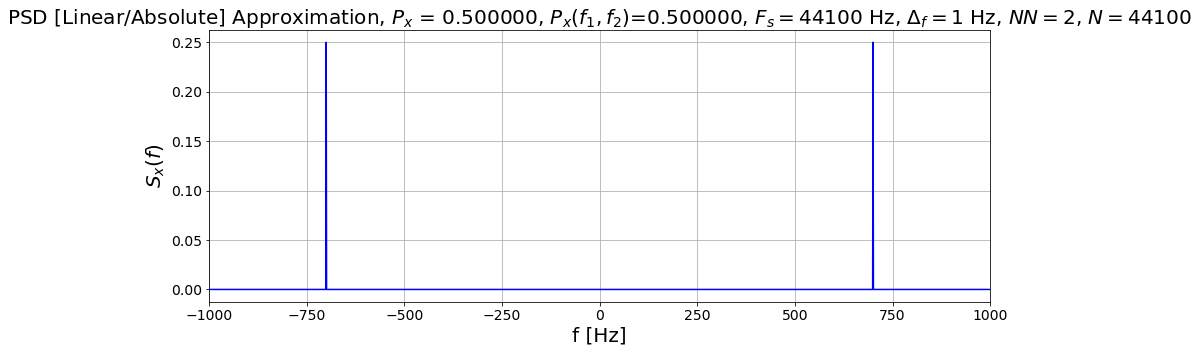

In [4]:
Fs = 44100 # Sampling rate
f1 = 700   # Test frequency 1
f2 = 720   # Test frequency 1
tlen = 2   # Duration in seconds
tt = arange(round(tlen*Fs))/float(Fs)   # Time axis
x1t = sin(2*pi*f1*tt)                   # Sine with freq f1
x2t = 0.01*cos(2*pi*f2*tt)              # Attenuated cosine with freq f2
sig_xt = sdr.sigWave(x1t+x2t, Fs, 0)    # Combined sinusoidal signal
ft.showpsd0(sig_xt,[-1000, 1000, 0],Fs) # Plot S_x(f)

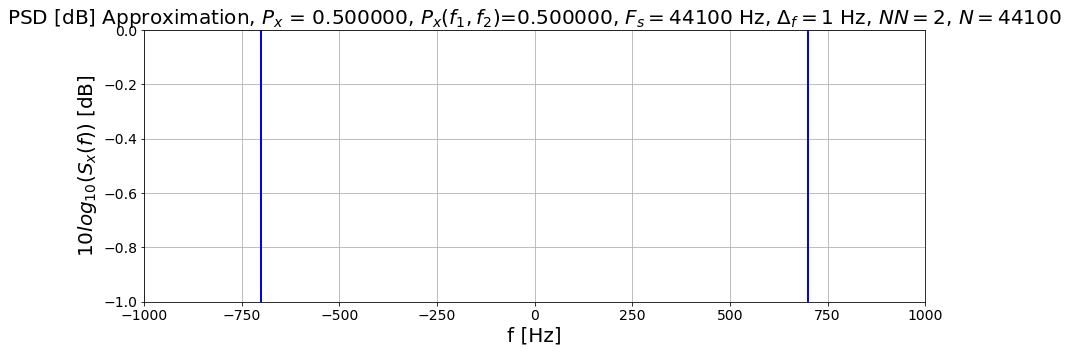

In [5]:
ft.showpsd0(sig_xt,[-1000, 1000, -1],Fs) # Plot S_x(f)

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 1.b - PSD power over a range of frequencies **

### -------------------------------------------------------------------------------------------------------------------------------------

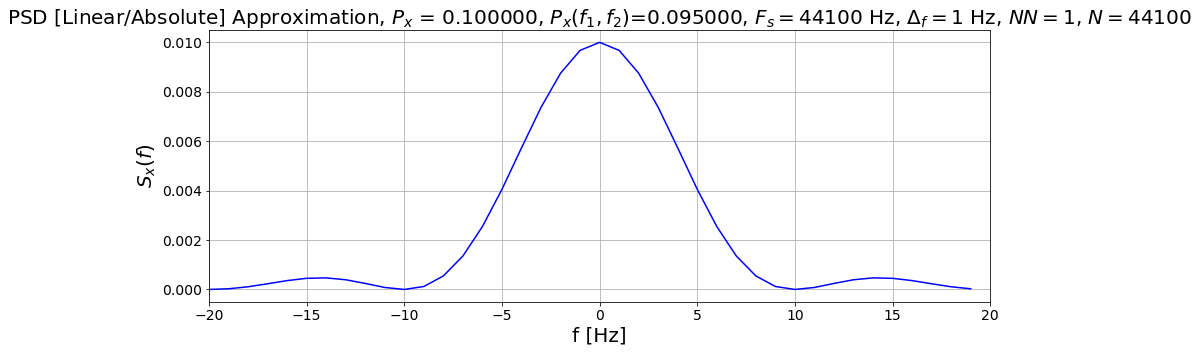

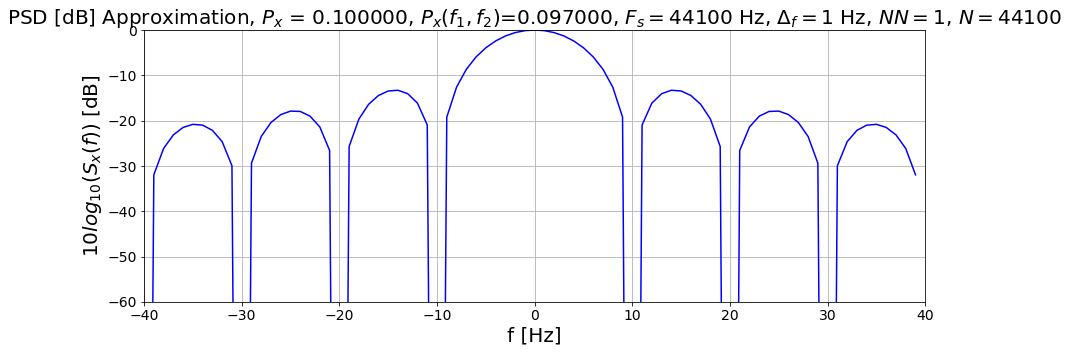

In [6]:
# Create a rectangular pulse
Fs = 44100   # Sampling rate
plen = .1    # 100 ms pulse
pt = ones(int(Fs*float(plen)))         # Pulse of width Fs*plen = 4410
z = zeros(int((Fs-len(pt))/float(2)))  # Need sufficient df
pt = concatenate((z, pt, z), axis = 0) # So pad with zeros s.t. len(pt)=44100 & df = 1hz
sig_1b = sdr.sigWave(pt.T, Fs, 0)      # Combined sinusoidal signal
ft.showpsd0(sig_1b,[-20, 20, 0],Fs)    # Plot S_x(f)
ft.showpsd0(sig_1b,[-40, 40, -60],Fs)   # Plot S_x(f)

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 1.c - Further Signal Power Investigation **

### -------------------------------------------------------------------------------------------------------------------------------------

Triangular Case:


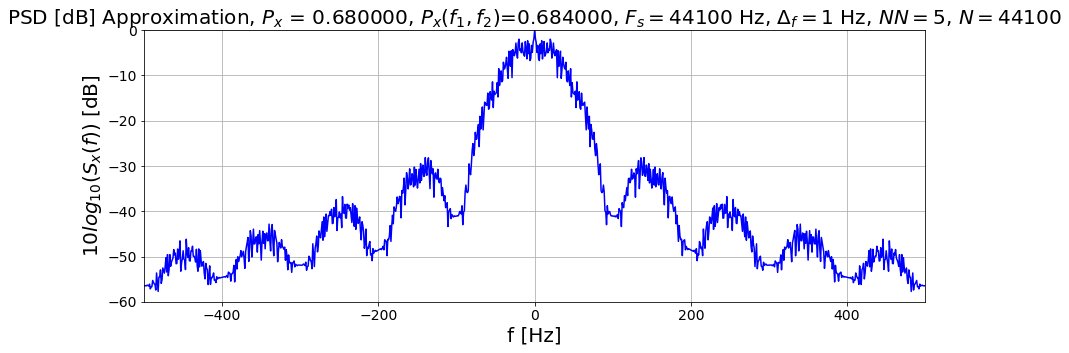

Rectangular Case:


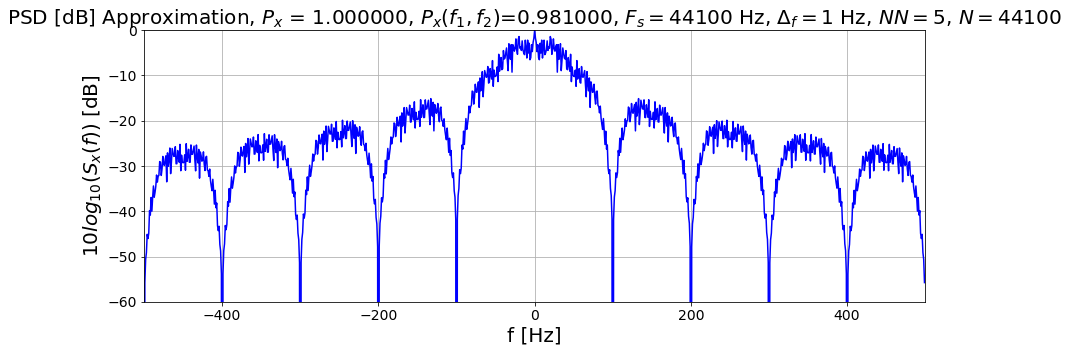

Sinc Case:


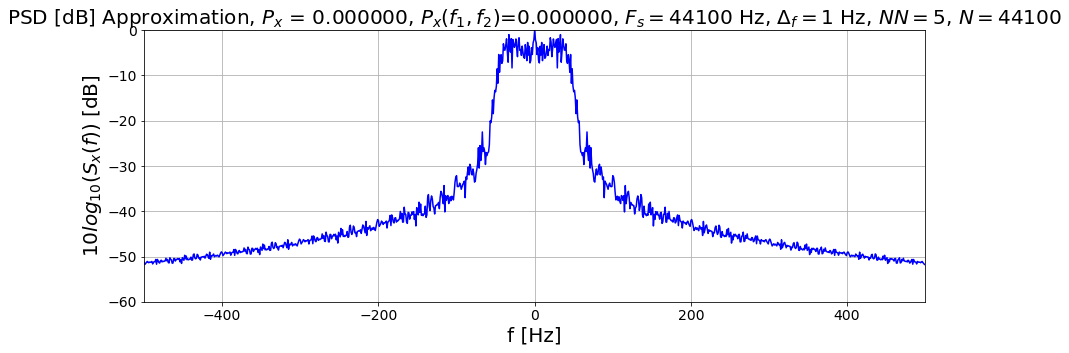

In [7]:
# Generate random polar binary message
Fs = 44100                   # Sampling rate
FB = 100                     # Baud rate
tlen = 5                     # Length in [s] of signal
dn = random(int(tlen*FB))       # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)  # Random unipolar binary sequence in {0,1}
an = 2*dn-1                  # Random polar binary sequence in {-1,+1}
sig_rn = sdr.sigSequ(an, 100, 0) # Put the sequenc into the sigSequ class

# Convert random signal to PAM of different types
psig_rn_tri = sdr.pam11(sig_rn,Fs,'tri','polar', 0) #Generate PAM pulse
psig_rn_rect = sdr.pam11(sig_rn,Fs,'rect','polar', 0) #Generate PAM pulse
psig_rn_sinc = sdr.pam11(sig_rn,Fs,'sinc','polar', 0, [3, 0]) #Generate PAM pulse

# Display using showpsd
print('Triangular Case:')
ft.showpsd0(psig_rn_tri,[-500, 500, -60],Fs)   # Plot S_x(f)
print('Rectangular Case:')
ft.showpsd0(psig_rn_rect,[-500, 500, -60],Fs)   # Plot S_x(f)
print('Sinc Case:')
ft.showpsd0(psig_rn_sinc,[-500, 500, -60],Fs)   # Plot S_x(f)

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 1.d -  PSD and Measuring Power in GNU Radio **

### -------------------------------------------------------------------------------------------------------------------------------------

Rectangular pulse AVG Power:

![title](img/Exp1_d0rec.png)

![title](img/Exp1_d1rec.png)

Triangular pulse AVG power:

![title](img/Exp1_d0tri.png)

![title](img/Exp1_d1tri.png)

Manchester Pulse AVG Power:

![title](img/Exp1_d0man.png)

![title](img/Exp1_d1man.png)

Sinc Pulse AVG Power:

![title](img/Exp1_d0sinc.png)

![title](img/Exp1_d1sinc.png)

RCF Pulse AVG Power: 
- It looks as though there is something wrong with my rcf pulse. The avg power is quite different from the sinc which seems wrong

![title](img/Exp1_d1rcf.png)

![title](img/Exp1_d0rcf.png)

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 1.e Power in Complex-Valued Waveforms.  **

### -------------------------------------------------------------------------------------------------------------------------------------

The total average power is the sum of the complex and real parts of the signal which represent equal parts of the whole as shown in the following 3 screenshots from GRC

![title](img/Exp1_ecos.png)

![title](img/Exp1_e1rect.png)

![title](img/Exp1_etri.png)

## Experiment 2:  . Generating and Estimating Noise

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 2.a - White Gaussian Noise Generation **

### -------------------------------------------------------------------------------------------------------------------------------------

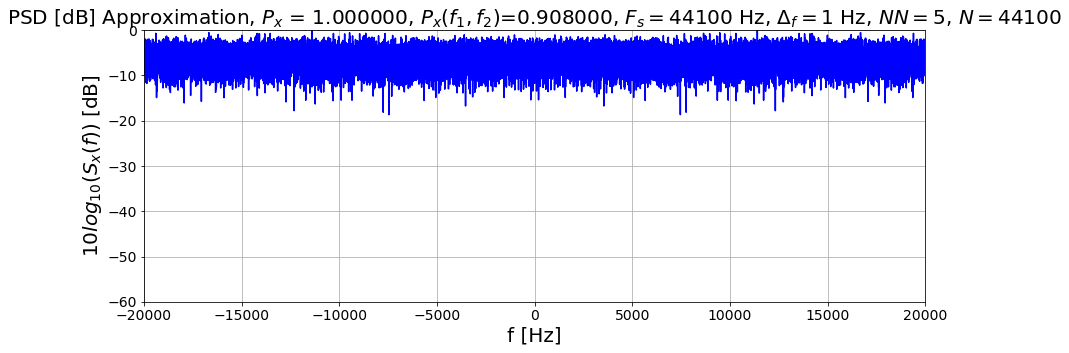

In [8]:
Fs = 44100 # Sampling rate
tlen = 5   # Duration in seconds
tt = arange(round(tlen*Fs))/float(Fs) # Time axis
nt = randn(len(tt))                   # Gaussian noise n(t)
sig_nt = sdr.sigWave(nt, Fs, tt[0])
ft.showpsd0(sig_nt,[-20000, 20000, -60],Fs)    # Plot S_x(f)

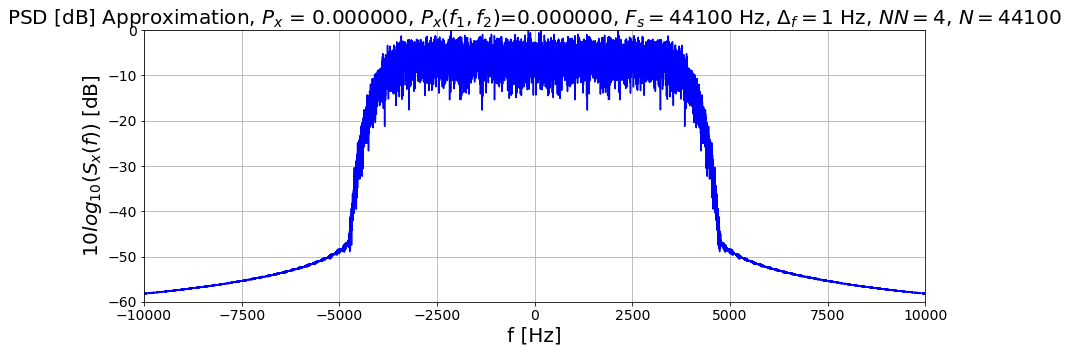

In [9]:
# Band Limited White Gaussian Noise
Fs = 44100                    # Sampling rate
nfL = 4000                    # Noise cutoff frequency
tlen = 5                      # Duration in seconds
nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = sdr.sigSequ(nn, 2*nfL, 0)
sig_nt = sdr.pam11(sig_nn,Fs,'rcf','unipolar', 0, [20, 0.2]) #Bandlimited noise n(t), rate Fs
ft.showpsd0(sig_nt,[-10000, 10000, -60],Fs)    # Plot S_x(f)

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 2.b - White Gaussian Noise Investigation **

### -------------------------------------------------------------------------------------------------------------------------------------

In [10]:
# Generate random polar binary message
Fs = 44100                   # Sampling rate
FB = 100                     # Baud rate
tlen = 2                     # Length in [s] of signal
dn = random(int(tlen*FB))       # Random sequence, uniform in [0...1]
dn = array(floor(2*dn),int)  # Random unipolar binary sequence in {0,1}
an = 2*dn-1                  # Random polar binary sequence in {-1,+1}
sig_rn = sdr.sigSequ(an, FB, 0) # Put the sequenc into the sigSequ class

# Convert random signal to PAM of different types
st = sdr.pam11(sig_rn,Fs,'tri','polar', 0) #Generate PAM pulse

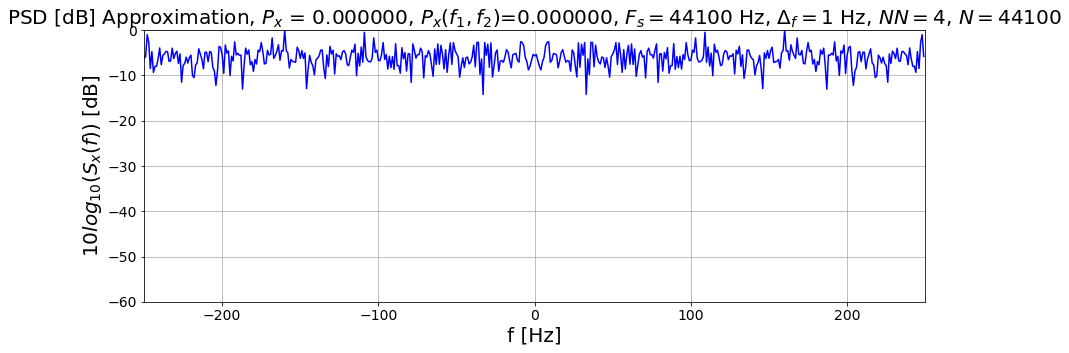

In [11]:
nfL = FB                               # Noise cutoff frequency
nn = randn(round(tlen*2*nfL))          # Gaussian noise, rate 2*nfL
sig_nn = sdr.sigSequ(nn, 2*nfL, 0)     # Honestly not sure about this 2 here?
nt = sdr.pam11(sig_nn,Fs,'rcf','unipolar', 0, [20, 0.2])  # Bandlimited noise n(t), rate Fs
ft.showpsd0(sig_nt,[-250, 250, -60],Fs)                 # Plot S_x(f)

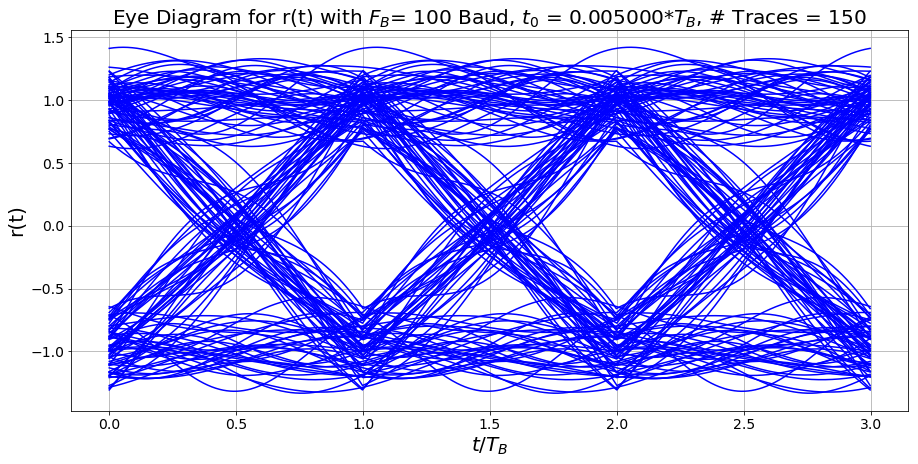

In [12]:
A = 8000
rt = st.sig + A*nt.sig
rt = sdr.sigWave(rt, Fs, 0)
L = 2       # Number of data levels
dly = 0.5   # Trigger delay TB/2
NTd = 150   # Number of data symbols
ft.showeye(rt, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

In [13]:
# SNR = A
print(20*log10(A), '[dB]')

78.0617997398 [dB]


### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 2.c PAM signal SNR estimation in GNU Radio   **

### -------------------------------------------------------------------------------------------------------------------------------------

In [38]:
Fs = 512000
FB = 32000
# Read wavfile
[db5, Fs] = sdr.wavread('Exp2_c5.wav')
[db10, Fs] = sdr.wavread('Exp2_c10.wav')
[db20, Fs] = sdr.wavread('Exp2_c20.wav')
[db20_comp, Fs] = sdr.wavread('Exp2_c20_comp.wav')

# Convert to class that showeye will understand
db5 = sdr.sigWave(db5, Fs, 0)
db10 = sdr.sigWave(db10, Fs, 0)
db20 = sdr.sigWave(db20, Fs, 0)
db20_comp = sdr.sigWave(db20_comp, Fs, 0)

# Set up parameters for showeye
L = 2       # Number of data levels
dly = 1     # Trigger delay TB/2
NTd = 150   # Number of data symbols

## 5 dB Case

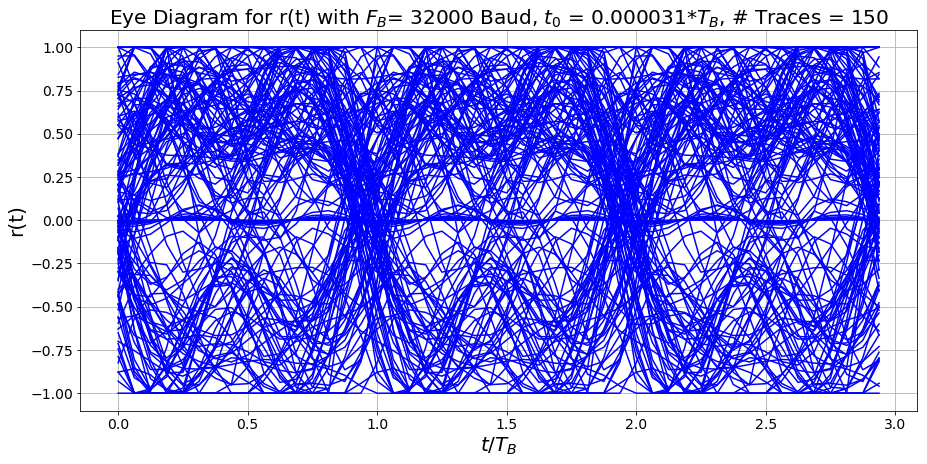

In [34]:
ft.showeye(db5, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

## 10 dB Case

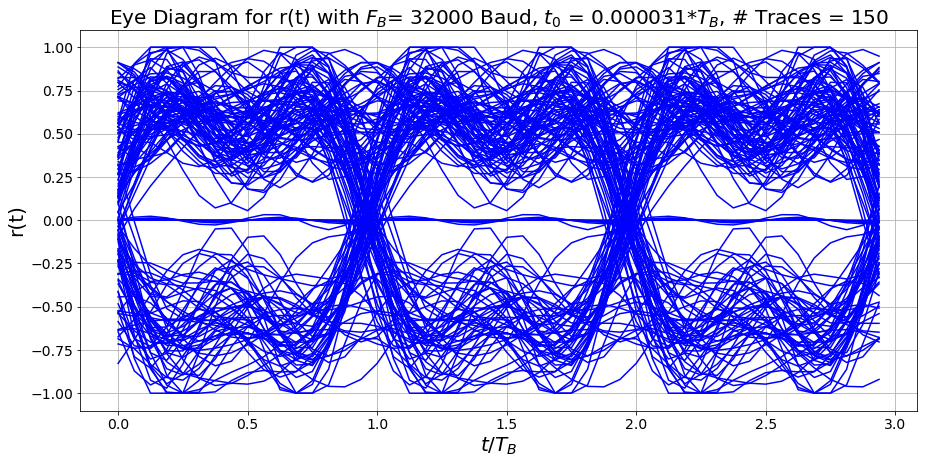

In [35]:
ft.showeye(db10, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

## 20 dB Case

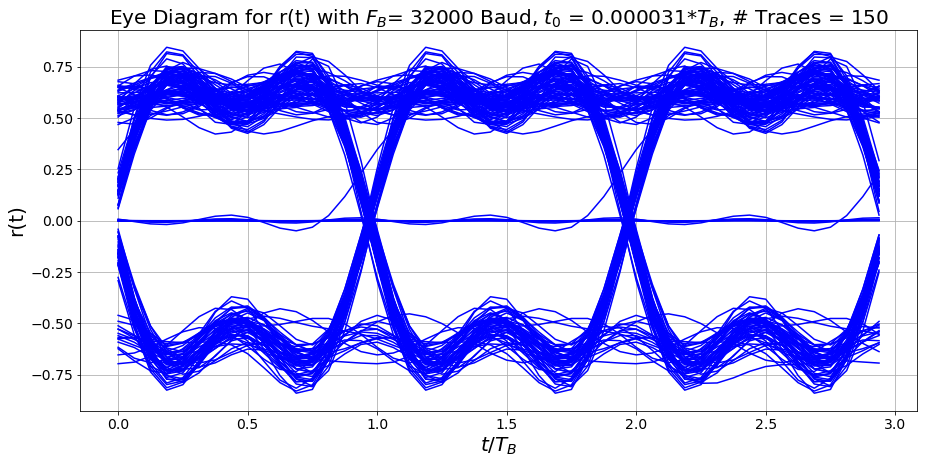

In [36]:
ft.showeye(db20, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

## 20 dB Case Comparison

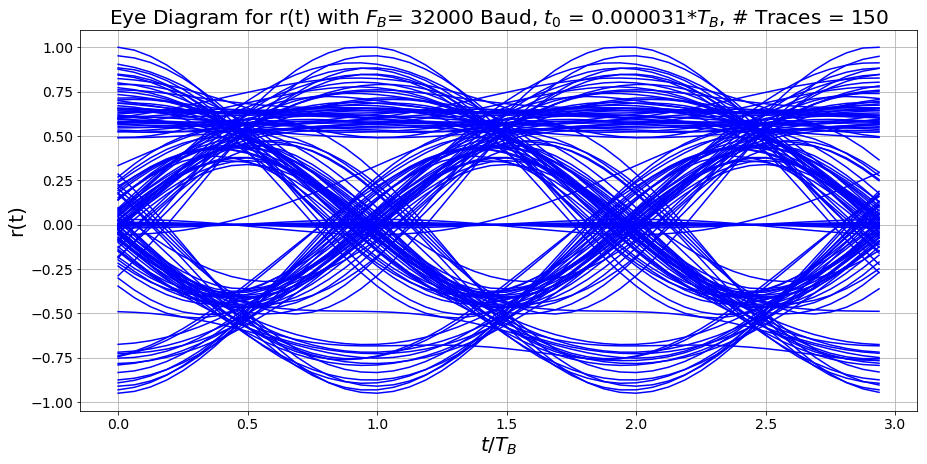

In [39]:
ft.showeye(db20_comp, FB, NTd, [dly, 3, -1.5*L, 1.5*L])

The eye diagram of the PAM signal with SNR = 20 and bandwidth = FB/2 has a reduced eye. With the bandwidth smaller in the frequency domain the signal has much slower waves. This can be seen by the transitions from .5 multiples of t/TB. The lines running from .5 t/TB to 1.5 t/TB for example, have appear to be sinusoidal of much lower frequency than those of the previous eye diagram. Thus occluding the eye. 

### -------------------------------------------------------------------------------------------------------------------------------------
 
 - ** 2.d Complex-Valued Noise in GNU Radio.    **

### -------------------------------------------------------------------------------------------------------------------------------------

(i) Gaussian noise with A=1 and fL=16000. 

** <span style="color:red"> NOTE: QT GUI Chooser doesn't work with the noise source option so I had to change them manually. I got points marked off for this in lab 3 even though the same thing happened, the QT Chooser didn't work and it is a KNOWN problem. </span>. **

![title](img/Exp2_digaus.png)

![title](img/Exp2_digaus0.png)

![title](img/Exp2_dgaus2.png)

(ii) Repeat (i) for ‘Uniform' noise.

![title](img/Exp2_diiuni.png)

Interestingly enough, moving A from 1 -> 2 adds 1 to the avg power. This is the same for both guassian and uniform noise

![title](img/Exp2_diiuni1.png)

The cutoff frequency $f_L$ also has a linear affect on the power of the noise. Moving from 16k to 8k cutoff cuts the power of the noise by half. This is also the same for Gaussian and Uniform noise

![title](img/Exp2_diiuni2.png)